QUORA INSINCERE QUESTIONS CLASSIFICATION

**>DOWNLOAD DATA ,EXPLORATION**

In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import os

In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [ ]:
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sample_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname = 'data/train.csv.zip'
    test_fname = 'data/test.csv.zip'
    sample_fname = 'data/sample_submission.csv.zip' 

 71% 39.0M/54.9M [00:00<00:00, 133MB/s]
100% 54.9M/54.9M [00:00<00:00, 134MB/s]
 32% 5.00M/15.8M [00:00<00:00, 32.8MB/s]
100% 15.8M/15.8M [00:00<00:00, 79.0MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 110MB/s]


In [ ]:
##EXPLORE DATA USING PANDAS:

In [ ]:
import pandas as pd


In [ ]:
train_fn='data/train.csv.zip'
test_fn='data/test.csv.zip'
sample_fn='data/sample_submission.csv.zip'

In [ ]:
raw_df=pd.read_csv(train_fn)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
from pandas.core.base import value_counts
raw_df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [ ]:
raw_df['target'].value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

 a question labeled "insincere" has a value of 1, otherwise **0**

In [ ]:
80810/1306122*100 #6% insincere

6.187017751787352

In [ ]:
sincere_df=raw_df[raw_df.target==0]

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere_df=raw_df[raw_df.target==1]

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

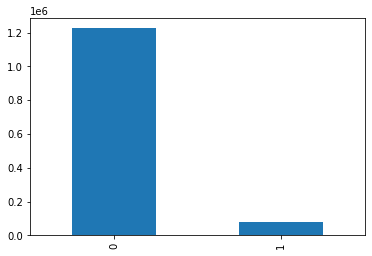

In [ ]:
raw_df['target'].value_counts().plot(kind='bar')

What is the average length of each question?
What are the most common words in each question?

In [ ]:
!pip install textstat


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00


In [ ]:
import textstat


In [ ]:
import spacy 
import textstat


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Splits the text into sentences, using
# Spacy's sentence segmentation which can
# be found at https://spacy.io/usage/spacy-101
def break_sentences(text):
    nlp = spacy.load('en_core_web_trf')
    doc = nlp(text)
    return list(doc.sents)
 
# Returns Number of Words in the text
def word_count(text):
    sentences = break_sentences(text)
    words = 0
    for sentence in sentences:
        words += len([token for token in sentence])
    return words
 
# Returns the number of sentences in the text
def sentence_count(text):
    sentences = break_sentences(text)
    return len(sentences)
 
# Returns average sentence length
def avg_sentence_length(text):
    words = word_count(text)
    sentences = sentence_count(text)
    average_sentence_length = float(words / sentences)
    return average_sentence_length

In [ ]:
#avg_sentence_length(sincere_df.question_text  )

In [ ]:
test_df=pd.read_csv(test_fn)

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub_df=pd.read_csv(sample_fn)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

Working sample

In [ ]:
SAMPLE_SIZE=100_000

In [ ]:
sample_df=raw_df.sample(SAMPLE_SIZE,random_state=42)

In [ ]:
sample_df.shape

(100000, 3)

In [ ]:
raw_df.shape

(1306122, 3)

TEXT PREPROCESSING TECHNIQUES

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

In [ ]:
q0=sincere_df.question_text.values[0]


In [ ]:
q0


'How did Quebec nationalists see their province as a nation in the 1960s?'

In [ ]:
q1=insincere_df.question_text.values[1]

In [ ]:
q1

'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?'

TOKENIZATION:

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
word_tokenize(q0)

['How',
 'did',
 'Quebec',
 'nationalists',
 'see',
 'their',
 'province',
 'as',
 'a',
 'nation',
 'in',
 'the',
 '1960s',
 '?']

In [ ]:
word_tokenize(q1)

['Which',
 'babies',
 'are',
 'more',
 'sweeter',
 'to',
 'their',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'or',
 'light',
 'skin',
 'babies',
 '?']

In [ ]:
q0_tok=word_tokenize(q0)
q1_tok=word_tokenize(q1)

StopWord Removal:

In [ ]:
from nltk.corpus import stopwords


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

In [ ]:
",".join(stops)

"and,will,shouldn,being,most,our,during,ma,himself,s,ain,doing,haven't,theirs,should,between,should've,y,own,some,him,to,that,i,shouldn't,at,are,haven,ours,wouldn,all,while,aren,his,do,because,weren,such,she's,of,re,its,hadn,these,an,this,each,have,couldn't,once,hasn't,it,wasn,my,has,ourselves,you'll,a,them,under,been,or,both,only,o,isn't,shan,there,that'll,themselves,too,wouldn't,nor,having,above,shan't,up,again,other,yourselves,you'd,were,ve,me,whom,ll,off,they,for,when,is,couldn,didn,hasn,doesn,her,the,what,as,from,which,hers,am,before,now,yourself,herself,weren't,mightn't,few,about,in,why,if,over,on,myself,so,their,below,don,aren't,with,your,then,mustn't,you,needn't,after,isn,be,any,no,mightn,but,hadn't,don't,you've,she,into,t,needn,more,it's,does,just,can,further,doesn't,how,was,wasn't,did,down,didn't,won't,out,who,you're,same,mustn,won,by,yours,he,against,those,very,not,itself,where,had,through,we,d,than,m,until,here"

In [ ]:
def remove_Stopwords(tokens):
  return [word for word in tokens if word.lower() not in stops]

In [ ]:
q0_stop=remove_Stopwords(q0_tok)

In [ ]:
q1_Stop=remove_Stopwords(q1_tok)
q1_Stop

['babies',
 'sweeter',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'light',
 'skin',
 'babies',
 '?']

In [ ]:
q1_tok

['Which',
 'babies',
 'are',
 'more',
 'sweeter',
 'to',
 'their',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'or',
 'light',
 'skin',
 'babies',
 '?']

Stemming:

In [ ]:
from nltk.stem import PorterStemmer


In [ ]:
ps = PorterStemmer()


In [ ]:
ps.stem("Kaushiki")

'kaushiki'

In [ ]:
ps.stem("Going")

'go'

In [ ]:
ps.stem("supposed")

'suppos'

In [ ]:
q0_stm=[ps.stem(word) for word in q0_stop  ]

In [ ]:
q0_stm

['quebec', 'nationalist', 'see', 'provinc', 'nation', '1960', '?']

In [ ]:
q0_stop

['Quebec', 'nationalists', 'see', 'province', 'nation', '1960s', '?']

In [ ]:
q1_stm=[ps.stem(word ) for word in  q1_Stop ]

In [ ]:
q1_stm

['babi',
 'sweeter',
 'parent',
 '?',
 'dark',
 'skin',
 'babi',
 'light',
 'skin',
 'babi',
 '?']

In [ ]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
  

In [ ]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer.lemmatize("better")

'better'

In [ ]:
lemmatizer.lemmatize("lover")

'lover'

###BOW IMPLEMENTATION:
1.Create a vocabulary using CountVectorizer

2.Transform Text to vectors using CountVectorizer

3.Configure TextPreprocessing in CountVectorizer


In [ ]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [ ]:
small_df=sample_df[:5]

In [ ]:
small_df


,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [ ]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
small_vect=CountVectorizer(lowercase=True)

In [ ]:
small_vect.fit(small_df.question_text.values)

CountVectorizer()

In [ ]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [ ]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

In [ ]:
vecs=small_vect.transform(small_df.question_text)

In [ ]:
vecs

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [ ]:
vecs.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

In [ ]:
vecs.shape

(5, 51)

###Configure CountVectorizer Params:

In [ ]:
def tokenize(text):
  return [stemmer.stem(word.lower()) for word in word_tokenize(text)]

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language='english')

In [ ]:
tokenize('What is your Name?')

['what', 'is', 'your', 'name', '?']

In [ ]:
tokenize('what is the really (dealing) here')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here']

In [ ]:
vectorizer=CountVectorizer(lowercase=True,
                           tokenizer=tokenize,stop_words=stops,
                           max_features=1000)

In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 31.6 s, sys: 162 ms, total: 31.7 s
Wall time: 32.3 s


CountVectorizer(max_features=1000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                tokenizer=<function tokenize at 0x7fc92ff67e50>)

In [ ]:
len(vectorizer.vocabulary_)

1000

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [ ]:
inputs=vectorizer.transform(sample_df.question_text)

In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 548298 stored elements in Compressed Sparse Row format>

In [ ]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

Note:Converted train data into vectors
##Why we didnot fit on test set?
**Very imp** 

When the Vectorizer has learnt vocabulary from the training set and is then going to create vectors for the training data using that vocabulary so when we get some new data either in the form of real world or we are testing it on the test dataset if we relearn the vocabulary then the order of words might change or a different set of words might come in so the new vectors may not make any sense.
Thus the vocabulary should be learnt only once on the training set but the transformation can be done on the testing or validation set.

In [ ]:
%%time
test_inputs=vectorizer.transform(test_df.question_text)

CPU times: user 1min 55s, sys: 440 ms, total: 1min 56s
Wall time: 1min 57s


###ML MODELS FOR TEXT CLASSIFICATION IN SUPERVISED LEARNING:
Outline:
-Create a training and validation set

-Train a logistic regression model

-Make predictions on training,validation and testdata


---



#

In [ ]:
sample_df


,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs,sample_df.target,test_size=0.30,random_state=42)

In [ ]:
train_inputs.shape

(70000, 1000)

In [ ]:
val_inputs.shape

(30000, 1000)

In [ ]:
train_targets.shape

(70000,)

In [ ]:
val_targets.shape

(30000,)

#Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=1000,solver='sag')

In [ ]:
%%time
model.fit(train_inputs,train_targets)

CPU times: user 37.8 s, sys: 59.8 ms, total: 37.9 s
Wall time: 42.5 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

In [ ]:
train_preds=model.predict(train_inputs)

In [ ]:
train_preds


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.Series(train_preds).value_counts()

0    67957
1     2043
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,train_preds)

0.9504428571428571

In [ ]:
accuracy_score(train_targets,np.zeros(len(train_targets)))


0.9397714285714286

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(train_targets,train_preds)

0.4457581083240134

In [ ]:
f1_score(train_targets,np.zeros(len(train_targets)))

0.0

In [ ]:
f1_score(train_targets,np.random.choice((0,1),len(train_targets)))



0.10673398097860731

In [ ]:
val_preds=model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets,val_preds)

0.9467

In [ ]:
f1_score(val_targets,val_preds)

0.40843507214206437

#Make submissions to Kaggle:

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2056612 stored elements in Compressed Sparse Row format>

In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
test_preds=model.predict(test_inputs)

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction=test_preds

In [ ]:
sub_df.prediction.value_counts()

0    364965
1     10841
Name: prediction, dtype: int64

In [ ]:
sub_df.to_csv('submission.csv',index=None)

In [ ]:
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,0
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
